In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Данные константы
k = 0.011  # (Вт/см/K)
c = 1.6  # (Дж/см3/K)
alpha = 0.5  # (Вт/см/K)
l = 0.5  # длина цилиндра
radius = 4  # радиус (см)
beta = 0.008  # (1/см)
u0 = 0  # (С)
t = 180  # время наблюдения (c)

In [3]:
# Задаем число отсчетов и шаги
num_m = 1000
num_i = 1000
tau = t/num_m # шаг по времени
h = radius/num_i # шаг по координате r
r_arr = np.linspace(0,l,num_i)
t_arr = np.linspace(0,t,num_m)
w = np.zeros((num_i, num_m))

In [4]:
import scipy.optimize
def bessel(x):
    return scipy.special.jv(0,x)
res = scipy.optimize.root(bessel, 2.3) # нахождение нуля функции в окрестности точки x = 2.3
mu1 = float(res.get('x'))  # первый нуль функции бесселя нулевого порядка

In [5]:
res

    fjac: array([[-1.]])
     fun: array([6.73229492e-14])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([-8.24997488e-09])
       r: array([0.51915174])
  status: 1
 success: True
       x: array([2.40482556])

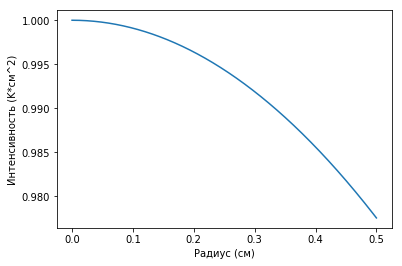

In [6]:
plt.plot(r_arr,bessel(mu1*r_arr/radius)) #нарисуем интенсивность
plt.ylabel('Интенсивность (K*см^2)')
plt.xlabel('Радиус (см)')
plt.show()

In [7]:
k1 = k*(mu1/radius)**2 + 2*alpha/l # вспомогательная функция, вылезшая в процесее решения
k1

2.0039759403495254

In [8]:
for i in range(num_i):
    for m in range(num_m):
        time = m*tau
        r_coordinate = i*h
        w[i,m] = beta/k1*(1-np.exp(-k1/c*time))*scipy.special.jv(0,mu1*r_coordinate/radius)

In [9]:
v = w + u0

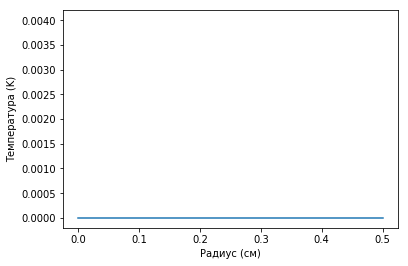

In [10]:
plt.plot(r_arr,v[:,0]) # распредление по радиусу в начальный момент времени
plt.ylim((-0.0002, 0.0042))
plt.ylabel('Температура (K)')
plt.xlabel('Радиус (см)')
plt.show()

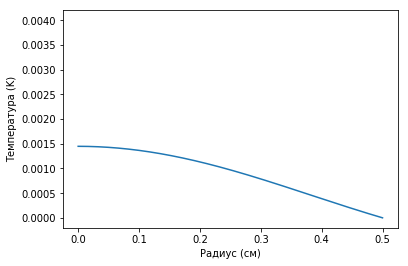

In [11]:
plt.plot(r_arr,v[:,2]) # распредление по радиусу во время второго отсчета по времени
plt.ylim((-0.0002, 0.0042))
plt.ylabel('Температура (K)')
plt.xlabel('Радиус (см)')
plt.show()

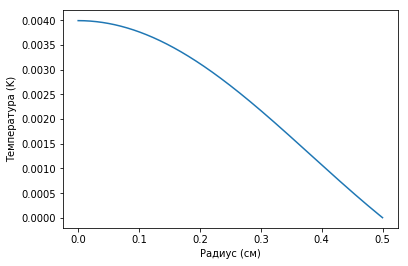

In [12]:
plt.plot(r_arr,v[:,100]) # распредление по радиусу во время 100 отсчета по времени (уже стационарное состояние)
plt.ylim((-0.0002, 0.0042))
plt.ylabel('Температура (K)')
plt.xlabel('Радиус (см)')
plt.show()

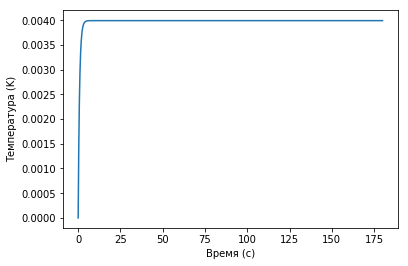

In [13]:
plt.plot(t_arr,v[0,:]) # распредление по времени во точке r = 0
plt.ylim((-0.0002, 0.0042))
plt.ylabel('Температура (K)')
plt.xlabel('Время (с)')
plt.show()

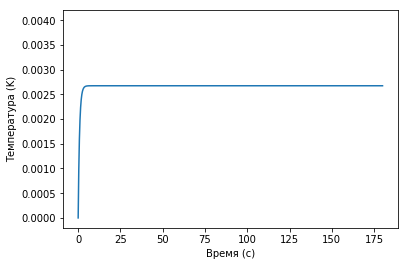

In [14]:
plt.plot(t_arr,v[500,:]) # распредление по времени во точке r = R/2
plt.ylim((-0.0002, 0.0042))
plt.ylabel('Температура (K)')
plt.xlabel('Время (с)')
plt.show()

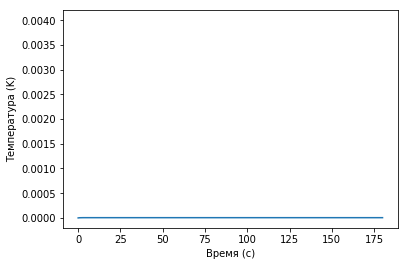

In [15]:
plt.plot(t_arr,v[-1,:]) # распредление по времени во точке r = R
plt.ylim((-0.0002, 0.0042))
plt.ylabel('Температура (K)')
plt.xlabel('Время (с)')
plt.show()

In [16]:
w[-1,10] # Температура на при r = R, во время 10 отсчета

4.4631986150964835e-06

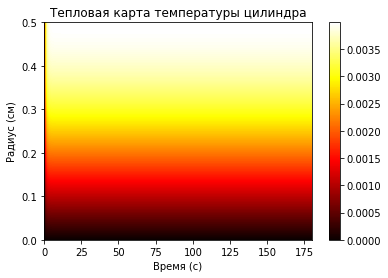

In [23]:
import matplotlib.cm as cmap
extent = [np.min(t_arr), np.max(t_arr), np.min(r_arr), np.max(r_arr)]
plt.imshow(v, cmap=cmap.hot, aspect='auto', extent=extent)
plt.title("Тепловая карта температуры цилиндра")
plt.ylabel('Радиус (см)')
plt.xlabel('Время (с)')
plt.colorbar()
plt.show()